<a href="https://colab.research.google.com/github/TrinhHoangKhang/AI-mini-project/blob/main/Homework/Module3/Projects/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
!gdown '1oGsM9EAFWiE28jDXT1IKhWwsqzIOcXcN'

Downloading...
From: https://drive.google.com/uc?id=1oGsM9EAFWiE28jDXT1IKhWwsqzIOcXcN
To: /content/cleveland.csv
100% 10.9k/10.9k [00:00<00:00, 23.9MB/s]


#### Preprocesss the dataset

In [4]:
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
'fbs', 'restecg', 'thalach', 'exang ',
'oldpeak', 'slope', 'ca', 'thal', 'target']
df.info()
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
0   63    1   1       145   233    1        2      150       0      2.3   
1   67    1   4       160   286    0        2      108       1      1

In [5]:
# Missing data?
df['ca'] = df.ca.fillna(df.ca.mean())
df['thal'] = df.thal.fillna(df.thal.mean())
# Turn the target to 0, 1 only
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


Text(0.5, 0, 'Age')

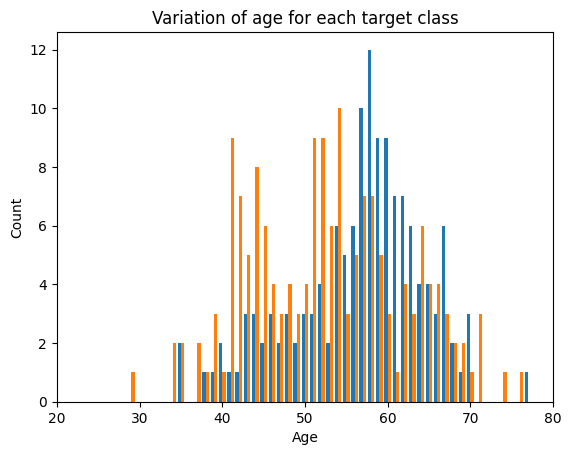

In [6]:
# Some insight
# Relation between Age and Target

# We plot two bar chart in one
age_of_positive = df.age[df.target == 1].sort_values().values
age_of_negative = df.age[df.target == 0].sort_values().values

# Find the number of people for each age
people_each_age_positive = []
people_each_age_negative = []
# Positive
prev_age = age_of_positive[0]
count = 0
for age in age_of_positive:
  if age == prev_age:
    count += 1
  else:
    people_each_age_positive.append(count)
    prev_age = age
    count = 1
people_each_age_positive.append(count)
# Negative
prev_age = age_of_negative[0]
count = 0
for age in age_of_negative:
  if age == prev_age:
    count += 1
  else:
    people_each_age_negative.append(count)
    prev_age = age
    count = 1
people_each_age_negative.append(count)

# Plot the result
age_of_positive_unique = np.array(list(set(age_of_positive)))
age_of_negative_unique = np.array(list(set(age_of_negative)))
plt.xlim(20, 80)
plt.xticks(range(20, 81, 10))
plt.bar(age_of_positive_unique-0.2, people_each_age_positive, width=0.4)
plt.bar(age_of_negative_unique+0.2, people_each_age_negative, width=0.4)
plt.title("Variation of age for each target class")
plt.ylabel("Count")
plt.xlabel("Age")

Text(0.5, 1.0, 'Distribution of age and sex with the target class')

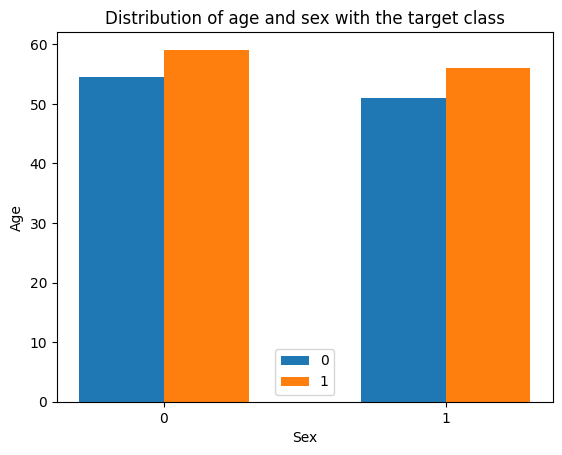

In [18]:
# Some insight
# Relation between Age, Sex and Target

age_of_positive_0_ave = np.mean(df.age[(df.target == 1) & (df.sex == 0)].sort_values().values)
age_of_positive_1_ave = np.mean(df.age[(df.target == 1) & (df.sex == 1)].sort_values().values)
age_of_negative_0_ave = np.mean(df.age[(df.target == 0) & (df.sex == 0)].sort_values().values)
age_of_negative_1_ave = np.mean(df.age[(df.target == 0) & (df.sex == 1)].sort_values().values)

plt.xticks([0, 1])
plt.bar([-0.15, 0.85], [age_of_negative_0_ave, age_of_negative_1_ave], width=0.3, label='0')
plt.bar([0.15, 1.15], [age_of_positive_0_ave, age_of_positive_1_ave], width=0.3, label='1')
plt.legend()
plt.xlabel("Sex")
plt.ylabel("Age")
plt.title("Distribution of age and sex with the target class")

### Train a KNN


In [21]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [26]:
knn = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski'
)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
y_pred = knn.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(accuracy)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.756198347107438
0.6885245901639344


### Use SVM


In [32]:
svm = SVC(
    kernel='rbf',
    random_state=42
)
svm.fit(X_train, y_train)

SVC(random_state=42)

In [33]:
y_pred = svm.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(accuracy)

y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6611570247933884
0.6721311475409836


### Use Naive Bayes

In [40]:
nb = CategoricalNB()
nb.fit(X_train, y_train)

CategoricalNB()

In [41]:
y_pred = nb.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(accuracy)

0.8966942148760331


### Use Decision tree

In [43]:
tree = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=2
)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [44]:
y_pred = tree.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(accuracy)

y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0
0.7540983606557377


### Use Random forest

In [45]:
rf = RandomForestClassifier(
    n_estimators=10,
    max_depth=10,
    min_samples_split=2,
    random_state=42
)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)

In [46]:
y_pred = rf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(accuracy)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9834710743801653
0.8032786885245902


### Use AdaBoost

In [47]:
ada = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=1
)
ada.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=1)

In [48]:
y_pred = ada.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(accuracy)

y_pred = ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9132231404958677
0.8360655737704918


### Dùng gradient boost

In [49]:
grad = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    min_samples_split=2,
    max_depth=3,
    random_state=42
)
grad.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [50]:
y_pred = grad.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(accuracy)

y_pred = grad.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9958677685950413
0.8524590163934426


### Use xgboost

In [53]:
xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [54]:
y_pred = xg.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(accuracy)

y_pred = xg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0
0.8688524590163934


### Use stacking

In [56]:
dtc = DecisionTreeClassifier ( random_state =42)
rfc = RandomForestClassifier ( random_state =42)
knn = KNeighborsClassifier ()
xgb = xgb.XGBClassifier()
gc = GradientBoostingClassifier ( random_state =42)
svc = SVC ( kernel = 'rbf', random_state =42)
ad = AdaBoostClassifier ( random_state =42)

base_models = [
    ('decision_tree', dtc),
    ('random_forest', rfc),
    ('k_neighbors', knn),
    ('xgboost', xgb),
    ('gradient_boosting', gc),
    ('svc', svc),
    ('ada_boost', ad)
]

meta_model = LogisticRegression()

stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

stacking_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

StackingClassifier(estimators=[('decision_tree',
                                DecisionTreeClassifier(random_state=42)),
                               ('random_forest',
                                RandomForestClassifier(random_state=42)),
                               ('k_neighbors', KNeighborsClassifier()),
                               ('xgboost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_r...
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('gradient_boosting',
                                GradientBoostingClassifier(random_state=42)),
                               ('svc', SVC(random_state=42)),
                               ('ada_boost',
                                AdaBoostClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

In [57]:
y_pred = stacking_clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(accuracy)

y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0
0.8852459016393442
